# PolynomialRegression with scikit learn

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
 
def PolynomialRegression(degree=2, fit_intercept=True):
    return make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), 
                         LinearRegression(fit_intercept=fit_intercept))

## Code
```python
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=2, fit_intercept=True):
    return make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), 
                         LinearRegression(fit_intercept=fit_intercept))
```

Official Reference: [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) and [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

## Parameters
- `degree`: the degree of the polynomial  
for example, if `degree=2` and two features a and b are given  
then a, b, a^2, a*b, b^2 are generated as the expanded features
- `fit_intercept`: whether to calculate the intercept or not  

## Attributes
For `model[0]`:
- `n_input_features`: the width of `X`  
- `n_output_features`: the number of expanded features
- `powers_` : an array of shape (n_output_features, n_input_features) that stores how each expanded feature is obtained

For `model[1]`:
- `coef_`: an array of shape `(n_output_features,)` that stores the coefficients for each expanded feature
- `intercept_`: the coefficient of the constant

## Sample data

##### Exercise 1
Let  
```python
x = np.arange(10)
y = 0.1*x**2 + 0.2*x + 0.3 + 0.5*np.random.randn(10)
X = x[:,np.newaxis]
x_test = np.linspace(0,10,20)
X_test = x_test[:,np.newaxis]

model = PolynomialRegression(2)
model.fit(X, y)
y_new = model.predict(X_test)
```

###### 1(a)
Use `plt.scatter` to plot the points with `x` and `y` .  
Use `plt.plot( ..., c='r')` to plot the line with `x_test` and `y_new` .  
Print `model.coef_` and  `model.intercept_` .  
Can you guess these values by the definition of `y` ?

[0.34494718 0.08962367]
-0.2689892541628085
Yes, these values can be guessed by definition of y because y is defined in almost perfect polynomial formula
Without considering added random noise: coefficient with second power should be around 0.1, linear coefficient 0.2 and intercept 0.3


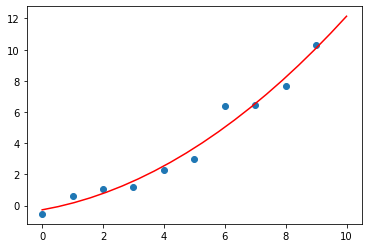

In [2]:
x = np.arange(10)
y = 0.1*x**2 + 0.2*x + 0.3 + 0.5*np.random.randn(10)
X = x[:,np.newaxis]
x_test = np.linspace(0,10,20)
X_test = x_test[:,np.newaxis]
 
model = PolynomialRegression(2)
model.fit(X, y)
y_new = model.predict(X_test)
plt.scatter(x,y)
plt.plot(x_test,y_new, c = "r")
print(model[1].coef_)#1-2degree
print(model[1].intercept_)
print("Yes, these values can be guessed by definition of y because y is defined in almost perfect polynomial formula")
print("Without considering added random noise: coefficient with second power should be around 0.1, linear coefficient 0.2 and intercept 0.3")

###### 1(b)
Redo 1(a) with the setting `fit_intercept=False` .

If set it_intercept=False, no intercept will be used in calculations (i.e. data is expected to be centered)
[0.18906065 0.10498315]
0.0


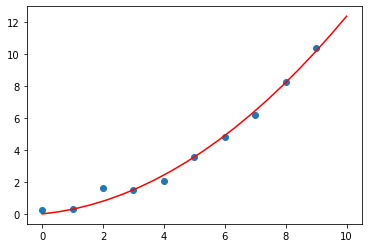

In [4]:

x = np.arange(10)
y = 0.1*x**2 + 0.2*x + 0.3 + 0.5*np.random.randn(10)
X = x[:,np.newaxis]
x_test = np.linspace(0,10,20)
X_test = x_test[:,np.newaxis]

model = PolynomialRegression(2,fit_intercept=False) 
print("If set it_intercept=False, no intercept will be used in calculations (i.e. data is expected to be centered)")
model.fit(X, y)
y_new = model.predict(X_test)

plt.scatter(x,y)
plt.plot(x_test,y_new,c='r')
print(model[1].coef_)
print(model[1].intercept_)

##### Exercise 2
Let  
```python
x1 = np.arange(5)
X = np.vstack([x1]).T

model = PolynomialFeatures(degree=3, include_bias=False)
X_ex = model.fit_transform(X)
```

###### 2(a)
Understand the relation between `X` and `X_ex` .  
Can you generate `X_ex` by boradcasting instead of the `PolynomialFeatures` function?

In [5]:
x1 = np.arange(5)
X = np.vstack([x1]).T

model = PolynomialFeatures(degree=3, include_bias=False)
X_ex = model.fit_transform(X)

print("X_ex=\n",X_ex)
print("\nX_ex just contains expanded features calculated as 1st,2nd and 3rd power of features in X vector\n")
print(np.hstack((X**1, X**2, X**3)))
#X_ex = X,X**2,X**3

X_ex=
 [[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  4.  8.]
 [ 3.  9. 27.]
 [ 4. 16. 64.]]

X_ex just contains expanded features calculated as 1st,2nd and 3rd power of features in X vector

[[ 0  0  0]
 [ 1  1  1]
 [ 2  4  8]
 [ 3  9 27]
 [ 4 16 64]]


###### 2(b)
Switch the setting to `include_bias=True` .  
Understand the relation between `X` and `X_ex` .  

In [6]:
x1 = np.arange(5)
X = np.vstack([x1]).T

model = PolynomialFeatures(degree=3, include_bias=True)
X_ex = model.fit_transform(X)

print("X_ex=\n",X_ex)
print("\nX_ex is the same as before but additionally it also contains a bias column")
print("the feature in which all polynomial powers are zero - acts as an intercept term in a linear model")

X_ex=
 [[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]

X_ex is the same as before but additionally it also contains a bias column
the feature in which all polynomial powers are zero - acts as an intercept term in a linear model


###### 2(c)
Let  
```python
x1 = np.arange(5)
x2 = np.arange(5,10)
X = np.vstack([x1,x2]).T

model = PolynomialFeatures(degree=2, include_bias=False)
X_ex = model.fit_transform(X)
```
Print `model.powers_` and understand the relation between `X` and `X_ex` .  

In [7]:

x1 = np.arange(5)
x2 = np.arange(5,10)
X = np.vstack([x1,x2]).T
 
model = PolynomialFeatures(degree=2, include_bias=False)
X_ex = model.fit_transform(X)
print(X)
print(X_ex)
print(model.powers_)
print("It's the same as:\n(x1^1 * x2^0)\n(x1^0 * x2^1)\n(x1^2 * x2^0)\n(x1^1 * x2^1)\n(x1^0 * x2^2)\n in transform")


[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]
[[ 0.  5.  0.  0. 25.]
 [ 1.  6.  1.  6. 36.]
 [ 2.  7.  4. 14. 49.]
 [ 3.  8.  9. 24. 64.]
 [ 4.  9. 16. 36. 81.]]
[[1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]
It's the same as:
(x1^1 * x2^0)
(x1^0 * x2^1)
(x1^2 * x2^0)
(x1^1 * x2^1)
(x1^0 * x2^2)
 in transform


###Exercise 3
Let
###r = 100 * np.random.rand(100)
###area = 4*np.pi*r**2 + 0.5*np.random.randn(100)
be a collection of data of 100 balls,
where c stores the radii and

area stores the surface areas.

Suppose you knows nothing about the formula of the surface area of a sphere.

How would you guess their relation?


[-1.95756131e-03  1.25663833e+01]
0.08509948170831194
area=intercept+coef[0]r+coef[2]r^2
Degree=1 (X), degree=2,3,4 the results look quite good => choose the smallest suitable degree=2


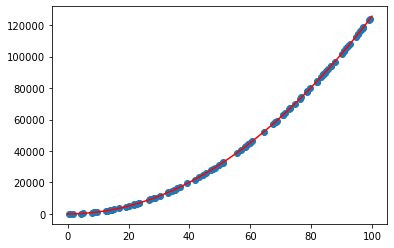

In [11]:
r = 100 * np.random.rand(100)
area = 4*np.pi*r**2 + 0.5*np.random.randn(100)

R = r[:,np.newaxis]
r_test = np.linspace(0,100,30)
R_test = r_test[:,np.newaxis]

model = PolynomialRegression(2) 
model.fit(R, area)
area_test = model.predict(R_test)
plt.scatter(r,area)
plt.plot(R_test,area_test,c='r')
print(model[1].coef_)
print(model[1].intercept_)
print("area=intercept+coef[0]r+coef[2]r^2")
print("Degree=1 (X), degree=2,3,4 the results look quite good => choose the smallest suitable degree=2")

##### Exercise 4
Let  
```python
r = 100 * np.random.rand(100)
volume = 4/3*np.pi*r**3 + 0.5*np.random.randn(100)
```
be a collection of data of 100 balls,  
where `c` stores the radii and  
`volume` stores the volumes.  
Suppose you knows nothing about the formula of the surface area of a sphere.  
How would you guess their relation?

area=intercept+coef[0]r+coef[2]r^2
Without knowing the formula we can try multiple PolynomialRegression models with various degrees
The smallest degree exactly fitting our radius and volume data is 3. That's why we can assume that the relation is cubic.


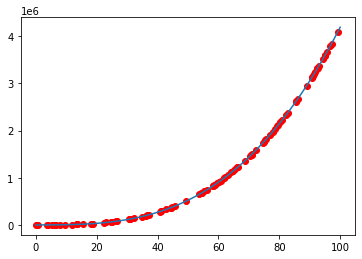

In [24]:
r = 100 * np.random.rand(100)
R = r[:,np.newaxis]
volume = 4/3*np.pi*r**3 + 0.5*np.random.randn(100)
plt.scatter(r, volume, c='r')

model = PolynomialRegression(3)
model.fit(R, volume)
r_test = np.linspace(0,100,50)[:,np.newaxis]
volume_test = model.predict(r_test)
plt.plot(r_test, volume_test)

print("area=intercept+coef[0]r+coef[2]r^2")
print("Without knowing the formula we can try multiple PolynomialRegression models with various degrees")
print("The smallest degree exactly fitting our radius and volume data is 3. That's why we can assume that the relation is cubic.")


## Experiments

##### Exercise 5
Let  
```python
x = np.arange(10)
y = 0.1*x**2 + 0.2*x + 0.3 + 0.5*np.random.randn(10)
X = x[:,np.newaxis]
x_test = np.linspace(0,10,20)
X_test = x_test[:,np.newaxis]
```
For `k = 0, ..., 4`, run the polynomial regression model with `degree=k`.  
Let `scores` be a list storing their scores.  
Plot the scores.  
Which degree is an appropriate guess?

Based on calculation of y, proper degree should be 2. However, in my opinion, using only 10 data points is not enough to correctly guess the degree 
since the noise can be too big. In following plot we can see mean squared error of each model at y axis with its respective degree at x axis. 
If we run the cell multiple times, we see big changes.
By adjusting (SIZE, UP_TO_K_DEGREE) variables to for example (100, 50) we can see that degree 2 is enough 
and from around degree 20 we start overfitting the data


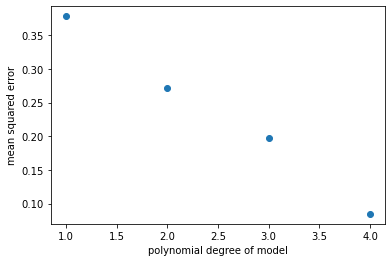

In [22]:
#博勛的方法
from sklearn.metrics import mean_squared_error

SIZE=10
x = np.arange(SIZE)
y = 0.1*x**2 + 0.2*x + 0.3 + 0.5*np.random.randn(SIZE)
X = x[:,np.newaxis]

training_size = int(SIZE*0.8)
testing_size = SIZE-training_size
indices = np.random.permutation(x.shape[0])
training_idx, test_idx = indices[:training_size], indices[testing_size:]

training_x, training_y = x[training_idx][:,np.newaxis], y[training_idx]
test_x, test_y = x[test_idx][:,np.newaxis], y[test_idx]

UP_TO_K_DEGREE = 5
msqs = []
ks = np.arange(1, UP_TO_K_DEGREE)
for k in ks:
    model = PolynomialRegression(k)
    model.fit(training_x, training_y)
    
    predict_y = model.predict(test_x)
    msqs.append(mean_squared_error(test_y, predict_y))
    
msqs = np.array(msqs)
plt.scatter(ks, msqs)
plt.xlabel("polynomial degree of model")
plt.ylabel("mean squared error")

print("Based on calculation of y, proper degree should be 2. However, in my opinion, using only 10 data points is not enough to correctly guess the degree ")
print("since the noise can be too big. In following plot we can see mean squared error of each model at y axis with its respective degree at x axis. ")
print("If we run the cell multiple times, we see big changes.")
print("By adjusting (SIZE, UP_TO_K_DEGREE) variables to for example (100, 50) we can see that degree 2 is enough ")
print("and from around degree 20 we start overfitting the data")


[0.66156734 0.26656106 0.18164504 0.18138906]
Choose Degree=2 (The smallest suitable degree
Since there are only 10 data points, it is not necessary to split the data here.


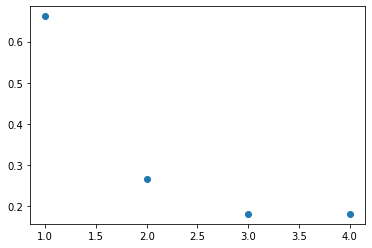

In [28]:
#Sanny的方法
from sklearn.metrics import mean_squared_error
x = np.arange(10)
X = x[:,np.newaxis]
y = 0.1*x**2 + 0.2*x + 0.3 + 0.5*np.random.randn(10)

scores=[] #Build a list storing scores
degree= np.arange(1,5)
for k in degree:
    model = PolynomialRegression(k)
    model.fit(X, y)
    y_new = model.predict(X) 
    scores.append(mean_squared_error(y_new,y)) 
scores=np.array(scores)

plt.scatter(degree,scores)
print(scores)

print("Choose Degree=2 (The smallest suitable degree")
print("Since there are only 10 data points, it is not necessary to split the data here.")


##### Exercise 6
Let  
```python
x = np.arange(10)
y = 0.1*x**2 + 0.2*x + 0.3 + 0.5*np.random.randn(10)
X = x[:,np.newaxis]

model = PolynomialRegression(2)
model.fit(X, y)
y_new = model.predict(X)

a0 = model[1].intercept_
a1,a2 = model[1].coef_
```
The prediction `y_new` is supposed to be the same as `a0 + a1*x + a2*x**2` .  
Check if it is true.

In [22]:

x = np.arange(10)
y = 0.1*x**2 + 0.2*x + 0.3 + 0.5*np.random.randn(10)
X = x[:,np.newaxis]
 
model = PolynomialRegression(2)
model.fit(X, y)
y_new = model.predict(X)
 
a0 = model[1].intercept_
a1,a2 = model[1].coef_
print(y_new-(a0 + a1*x+a2*x**2))
print("We can see that is the statement is merely the same")


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
We can see that is the statement is merely the same
